In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('..'))

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import helium

plotdir = 'plots/'
datadir='data/'

sigmas=pd.read_csv(datadir+'sigmas.csv.gz',index_col=0,parse_dates=[0]).iloc[:,:-1]
returns=pd.read_csv(datadir+'returns.csv.gz',index_col=0,parse_dates=[0])
volumes=pd.read_csv(datadir+'volumes.csv.gz',index_col=0,parse_dates=[0]).iloc[:,:-1]

subset_tickers  = list(volumes.ix[:, (volumes > 0).all()].columns)[:30] + ["USDOLLAR"]

#, 'NKE', 'IBM', 'BAC', 'C'
#subset_tickers = ['AMZN', 'GOOGL', 'BAC', 'USDOLLAR']
sigmas = sigmas.ix[:, sigmas.columns.isin(subset_tickers)]
returns = returns.ix[:, returns.columns.isin(subset_tickers)]
volumes = volumes.ix[:, volumes.columns.isin(subset_tickers)]


start_date="2014-01-01"
end_date="2016-12-29"

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [3]:
cash_ticker = "_CASH"

In [4]:
sigmas[cash_ticker] = 0.
returns = returns.rename(columns={"USDOLLAR": cash_ticker})
volumes[cash_ticker] = np.finfo(np.float).max

In [5]:
w_b = pd.Series(index=returns.columns, data=1)
w_b._CASH = 0.
w_b/=sum(w_b)


In [6]:
return_estimate=pd.read_csv(datadir+'return_estimate.csv.gz',index_col=0,parse_dates=[0]).dropna()
volume_estimate=pd.read_csv(datadir+'volume_estimate.csv.gz',index_col=0,parse_dates=[0]).iloc[:,:-1].dropna()
sigma_estimate=pd.read_csv(datadir+'sigma_estimate.csv.gz',index_col=0,parse_dates=[0]).iloc[:,:-1].dropna()

return_estimate = return_estimate.ix[:, return_estimate.columns.isin(subset_tickers)]
volume_estimate = volume_estimate.ix[:, volume_estimate.columns.isin(subset_tickers)]
sigma_estimate = sigma_estimate.ix[:, sigma_estimate.columns.isin(subset_tickers)]

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


In [7]:
sigma_estimate[cash_ticker] = 0.
return_estimate = return_estimate.rename(columns={"USDOLLAR": cash_ticker})
volume_estimate[cash_ticker] = np.finfo(np.float).max

In [8]:
half_spread = returns.copy()
half_spread[:] =0.0005/2
half_spread[cash_ticker] = 0.

In [9]:
borrow_costs = returns.copy()
borrow_costs[:] = 1E-4
borrow_costs[cash_ticker] = 0.

dividends = returns.copy()
dividends[:] = 0.

simulated_hcost=helium.HoldingCost(gamma = 1., borrow_costs=borrow_costs, dividends=dividends)
simulated_tcost=helium.TransactionCost(gamma =1.0, 
                                             half_spread=half_spread,
                                             nonlin_coef = 1.,
                                             sigmas = sigmas, 
                                             nonlin_power = 1.5,
                                             volumes = volumes,
                                             asym_coef = 0.)

simulator = helium.MarketSimulator(returns, volumes, costs=[
    simulated_tcost, 
    simulated_hcost
], cash_ticker=cash_ticker)

In [10]:
r_est_dict = {}
d_est_dict = {}
for day in return_estimate.index[:-1]:
    rrr = return_estimate.loc[day:].iloc[:2].copy()
    r_est_dict[day] = rrr
    deltas = rrr.copy()
    deltas[:] = 0.
    d_est_dict[day] = deltas

In [13]:
return_estimate

,MMM,ABT,ACN,ATVI,ADBE,AAP,AES,AET,AFL,AMG,...,AAL,AEP,AXP,AMT,AMP,ABC,AME,AMGN,APH,_CASH
Date,,,,,,,,,,,,,,,,,,,,,
2007-01-04,0.005988,0.001843,0.003926,0.007929,0.006992,-0.003213,0.003288,-0.000954,-0.000625,0.001151,...,0.003353,0.002976,-0.002738,0.007733,-0.004858,0.000241,-0.000799,0.006332,0.005860,0.000196
2007-01-05,0.002831,0.000955,-0.003691,0.000945,0.002714,-0.000520,0.002061,-0.000147,-0.001331,-0.004195,...,0.000734,0.000713,0.006650,-0.001830,-0.007629,0.000402,-0.000630,-0.001727,-0.003817,0.000197
2007-01-08,0.000838,-0.003419,-0.000043,0.001051,-0.004830,0.003069,0.003387,-0.002101,-0.000816,-0.002708,...,-0.003213,0.003213,-0.001582,0.001631,-0.002461,-0.001848,0.001668,0.003015,-0.001084,0.000198
2007-01-09,0.000743,0.001130,0.000490,-0.006770,-0.005484,-0.001352,0.000104,-0.000851,-0.003211,-0.004415,...,-0.001812,-0.000020,-0.004630,-0.000767,-0.002306,-0.001422,-0.000207,-0.002642,-0.001263,0.000198
2007-01-10,0.001643,-0.001157,-0.003205,0.005417,0.008331,0.005884,0.001191,0.006390,0.001519,-0.001534,...,-0.000242,0.000253,0.004879,0.003322,-0.004700,0.003116,0.000557,-0.001257,-0.000097,0.000198
2007-01-11,-0.002766,-0.002380,-0.002551,0.005143,0.000772,-0.002801,-0.001554,-0.002243,-0.000301,0.003230,...,-0.000781,-0.004697,-0.003143,-0.003405,0.004765,-0.000419,-0.002615,-0.003273,0.001225,0.000199
2007-01-12,0.002825,-0.004769,-0.002102,-0.001328,-0.000275,0.001237,-0.002883,-0.003958,0.002295,0.000251,...,0.004101,0.004510,-0.003221,-0.000635,-0.002614,-0.005767,0.001169,0.002992,0.006955,0.000198
2007-01-16,0.003165,-0.005367,0.000276,0.005889,-0.002104,0.001629,0.003519,0.000915,-0.002267,-0.002544,...,0.003905,-0.003187,0.007500,-0.000371,-0.002388,0.001195,0.004085,-0.003399,0.002320,0.000199
2007-01-17,0.002013,0.003329,0.000373,0.007102,-0.000210,-0.001810,-0.010490,-0.000397,0.002608,0.000188,...,-0.000617,-0.000624,-0.003950,0.001371,-0.002109,0.003984,-0.000094,0.000581,-0.006720,0.000200


In [17]:
r= helium.DefaultReturns(r_est_dict,  d_est_dict , gamma_decay=None)
#Sigma_hat = returns.rolling(window=250, min_periods=250).cov().unstack().shift(1).stack().dropna()

In [18]:
Sigma_hat = returns.rolling(window=250, min_periods=250).cov().unstack().shift(1).stack().dropna()

In [24]:
policies = {}
results = {}
gamma_risks_coarse=[.1,.3,1, 3,10,30,100,300,1000]
gamma_tcosts_coarse=[1., 2., 5,10,20]
for gamma_risk in gamma_risks_coarse:
    for gamma_tcost in gamma_tcosts_coarse: 
        risk_model = helium.BasicRiskCost(gamma_risk, Sigma_hat)
        optimization_hcost = helium.HoldingCost(gamma = 1., borrow_costs=borrow_costs, dividends=dividends)
        optimization_tcost = helium.TransactionCost(gamma_tcost, 
                                                    half_spread=half_spread, 
                                                    nonlin_coef = 1.,
                                                    sigmas = sigma_estimate, 
                                                    nonlin_power = 1.5,
                                                    volumes = volume_estimate,
                                                    asym_coef = 0.)
        
        # issue optimization_tcost
        costs = [
           
            risk_model, 
                 optimization_tcost, 
                optimization_hcost
                ]
        const = [helium.LeverageLimitConstraint(3)]
        policies[(gamma_risk, gamma_tcost)] = helium.MultiPeriodOpt(r, costs, const, 2)

In [25]:
results = {}
results.update(dict(zip(policies.keys(), simulator.run_multi(1E8*w_b, policies.values(), start_date, end_date, parallel=False ) ) ))

In [26]:
result_df_coarse=pd.DataFrame()
for k in results:
    if k[0] in gamma_risks_coarse and k[1] in gamma_tcosts_coarse:
        result_df_coarse.loc[k[0], k[1]] = results[k]
        
result_df = result_df_coarse.loc[sorted(result_df_coarse.index), sorted(result_df_coarse.columns)]

[33.534429131524462, 33.021190097919174, 31.454371467572255, 28.541196176075694, 23.025899511062388, 15.544207205913624, 9.400311976927803, 4.6960536883324613, 1.6072895427237404] [-39.28289963453466, -39.273994782436084, -39.14427211009325, -37.41065156078391, -32.38262407019295, -28.98662591831792, -25.358221435404115, -12.577149342027843, -2.687571235568374]
[25.352724998969624, 24.903509025318673, 23.660025597408595, 21.398219757098587, 16.962264291479283, 11.444065348336508, 7.397807591562847, 3.4037921101713007, 1.2468716786738783] [2.137710315584862, 2.7609142934154436, 4.322181587027461, 7.374615689832761, 6.793066725730785, -1.4233603112685307, -4.990987377142694, -2.0677538133183004, -0.1735462243070579]
[19.978972893527821, 19.349320020860716, 17.685144085341491, 14.991166215378447, 10.544837757419455, 7.613653125709317, 3.992398782672085, 1.9222761760055751, 0.79950095244311814] [27.026296987822256, 25.64300330717787, 22.587081129794793, 18.249419037549576, 12.5238875952896

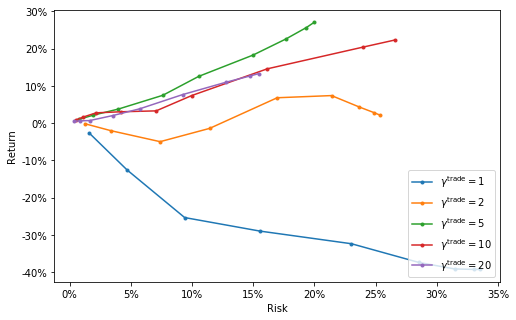

In [27]:
plt.figure(figsize=(8,5))
for gamma_tcost in result_df.columns:
    x=[el.excess_returns.std()*100*np.sqrt(250) for el in result_df[gamma_tcost]]
    y=[el.excess_returns.mean()*100*250 for el in result_df[gamma_tcost]]
    print(x,y)
    plt.plot(np.array(x),np.array(y), '.-', label='$\gamma^\mathrm{trade} = %g$'%gamma_tcost)
plt.legend(loc='lower right')
plt.xlabel('Risk')
plt.ylabel('Return')

import matplotlib.ticker as mtick
ax = plt.gca()
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f%%'))
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f%%'))

#plt.savefig(plotdir+'spo_riskrewardfrontier.png')

### Fine Search

In [28]:
gamma_risks_fine=gamma_risks_coarse
gamma_tcosts_fine=[4,5,6,7,8]
for gamma_risk in gamma_risks_fine:
    for gamma_tcost in gamma_tcosts_fine:
        risk_model = helium.BasicRiskCost(gamma_risk, Sigma_hat)
        optimization_hcost = helium.HoldingCost(gamma = 1., borrow_costs=borrow_costs, dividends=dividends)
        optimization_tcost = helium.TransactionCost(gamma_tcost, 
                                                    half_spread=half_spread, 
                                                    nonlin_coef = 1.,
                                                    sigmas = sigma_estimate, 
                                                    nonlin_power = 1.5,
                                                    volumes = volume_estimate,
                                                    asym_coef = 0.)
        
        # issue optimization_tcost
        costs = [
           
            risk_model, 
                 optimization_tcost, 
                optimization_hcost
                ]
        const = [helium.LeverageLimitConstraint(3)]
        policies[(gamma_risk, gamma_tcost)] = helium.MultiPeriodOpt(r, costs, const, 2)

results.update(dict(zip(policies.keys(), simulator.run_multi(1E8*w_b, policies.values(), start_date, end_date, parallel=True ) ) ) )

In [29]:
result_df_fine=pd.DataFrame()
for k in results:
    if k[0] in gamma_risks_fine and k[1] in list(gamma_tcosts_fine):
        result_df_fine.loc[k[0], k[1]] = results[k]
        
result_df_fine=result_df_fine.loc[sorted(result_df_fine.index),sorted(result_df_fine.columns)]

[20.274836638413632, 19.799444058141862, 18.443751771334767, 16.209378644544053, 12.013559387913967, 8.4608712513623132, 4.8319204299390233, 2.2582946930196575, 0.90757283794139154] [25.729543920148092, 24.871439738793804, 23.284592730572584, 20.45414472514318, 15.37911188004053, 8.50586173090912, 3.2665313532904916, 1.9008548603590927, 0.94332390738325]
[19.978966913379281, 19.349320581047078, 17.685146350863338, 14.991166824238665, 10.544834816512269, 7.6136527734985444, 3.9923986410486765, 1.922276119938517, 0.79950105411918138] [27.02632998047561, 25.643024558658773, 22.58705773603992, 18.249432421157444, 12.523884175067662, 7.449007890364287, 3.763843355488721, 2.107168287493459, 1.0304479002505316]
[20.568641273571679, 19.532168231218236, 17.312914808689069, 13.753655564228321, 9.5132099429328765, 6.7904499722109, 3.4030018652950598, 1.6657770695074376, 0.71103073311738096] [27.971764443452727, 26.418774500241838, 22.69732411468127, 15.725162450419521, 10.023195117825992, 6.49271

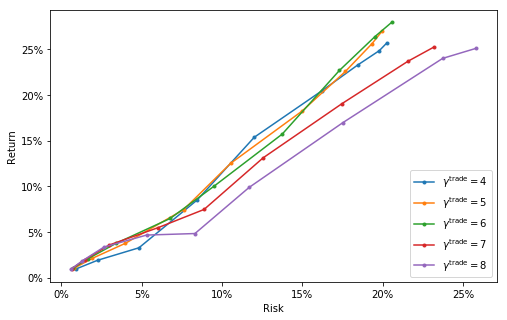

In [30]:
plt.figure(figsize=(8,5))
for gamma_tcost in result_df_fine.columns[:]:
    x=[el.excess_returns.std()*100*np.sqrt(250) for el in result_df_fine[gamma_tcost]]
    y=[el.excess_returns.mean()*100*250 for el in result_df_fine[gamma_tcost]]
    print(x,y)
    plt.plot(np.array(x),np.array(y), '.-', label='$\gamma^\mathrm{trade} = %g$'%gamma_tcost)
plt.legend(loc='lower right')
plt.xlabel('Risk')
plt.ylabel('Return')

import matplotlib.ticker as mtick
ax = plt.gca()
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f%%'))
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f%%'))

#plt.savefig(plotdir+'spo_riskrewardfrontier_fine.png')

### Pareto

In [31]:
policies = {}
#results = {}
gamma_risks_pareto=[1, 2, 3, 6, 10, 18, 32, 56, 100, 178, 316, 562, 1000]
gamma_tcosts_pareto=[7,8,9,10,11,12]
gamma_holdings=[.1,1.,10., 100.,1000.]
for gamma_risk in gamma_risks_pareto:
    for gamma_tcost in gamma_tcosts_pareto : 
        for gamma_holding in gamma_holdings:
            
            
            risk_model = helium.BasicRiskCost(gamma_risk, Sigma_hat)
            optimization_hcost = helium.HoldingCost(gamma = gamma_holding, borrow_costs=borrow_costs, dividends=dividends)
            optimization_tcost = helium.TransactionCost(gamma_tcost, 
                                                    half_spread=half_spread, 
                                                    nonlin_coef = 1.,
                                                    sigmas = sigma_estimate, 
                                                    nonlin_power = 1.5,
                                                    volumes = volume_estimate,
                                                    asym_coef = 0.)
        
            # issue optimization_tcost
            costs = [ risk_model,                  optimization_tcost,                 optimization_hcost                ]
            const = [helium.LeverageLimitConstraint(3)]
            policies[(gamma_risk, gamma_tcost, gamma_holding)] = helium.MultiPeriodOpt(r, costs, const, 2)

        
results_pareto = {}
results_pareto.update(dict(zip(policies.keys(), simulator.run_multi(1E8*w_b, policies.values(), start_date, end_date, parallel=True ) ) ) ) 

In [38]:
helium.TransactionCost??

In [32]:
table=pd.DataFrame()
table[r'$\gamma^\mathrm{risk}$']=[el[0] for el in results_pareto.keys()]
table[r'$\gamma^\mathrm{trade}$']=[el[1] for el in results_pareto.keys()]
table[r'$\gamma^\mathrm{hold}$']=['%g'%el[2] for el in results_pareto.keys()]
table['Return']=[(results_pareto[k].excess_returns.mean()*100*250) for k in results_pareto.keys()]
table['Risk']=[(results_pareto[k].excess_returns.std()*100*np.sqrt(250)) for k in results_pareto.keys()]

table = table.sort_values('Risk', ascending=False).reset_index()
del table['index']
is_pareto = lambda i: table.loc[i,'Return']>=max(table.ix[i:].Return)
table['is_pareto'] = [is_pareto(i) for i in range(len(table))]
table.to_csv(datadir+'mpo_pareto_results_big.csv', float_format='%g')

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


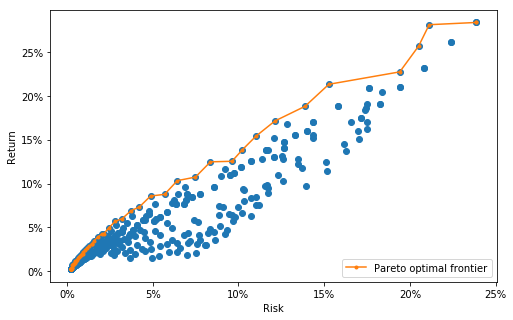

In [33]:
plt.figure(figsize=(8,5))
plt.scatter(table.Risk.values,table.Return.values)
plt.plot(table[table.is_pareto].Risk,table[table.is_pareto].Return, 'C1.-', label='Pareto optimal frontier')
plt.legend( loc='lower right')
plt.xlabel('Risk')
plt.ylabel('Return')

import matplotlib.ticker as mtick
ax = plt.gca()
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f%%'))
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f%%'))

#plt.savefig(plotdir+'mpo_pareto.png')

In [34]:
xlim=20
ylim=30
tableprint=table[table.is_pareto]
tableprint=tableprint[tableprint.Risk <= xlim]
tableprint=tableprint[tableprint.Return <= ylim]
del tableprint['is_pareto']
tableprint.Risk=tableprint.Risk.apply(lambda x: '%.2f%%'%x)
tableprint.Return=tableprint.Return.apply(lambda x: '%.2f%%'%x)
print(tableprint.iloc[::-1].to_latex(float_format='%.2f', escape=False, index=False).replace('%',r'\%'))

\begin{tabular}{rrlll}
\toprule
 $\gamma^\mathrm{risk}$ &  $\gamma^\mathrm{trade}$ & $\gamma^\mathrm{hold}$ &  Return &    Risk \\
\midrule
                   1000 &                       12 &                    100 &   0.23\% &   0.22\% \\
                   1000 &                       12 &                   1000 &   0.23\% &   0.22\% \\
                   1000 &                       11 &                    100 &   0.25\% &   0.23\% \\
                   1000 &                       11 &                   1000 &   0.25\% &   0.23\% \\
                   1000 &                       10 &                    100 &   0.27\% &   0.23\% \\
                   1000 &                       10 &                   1000 &   0.27\% &   0.23\% \\
                   1000 &                        9 &                    100 &   0.29\% &   0.24\% \\
                   1000 &                        8 &                    100 &   0.30\% &   0.25\% \\
                   1000 &                        7 &

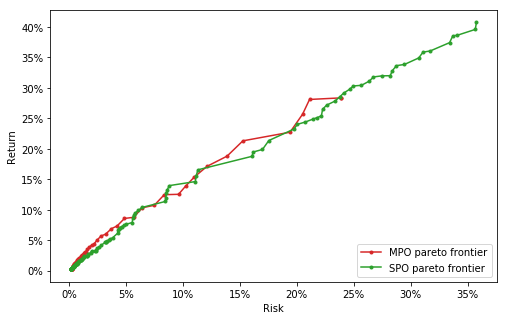

In [35]:
table_spo = pd.read_csv(datadir + 'spo_pareto_results.csv', index_col=0)

plt.figure(figsize=(8,5))

plt.plot(table[table.is_pareto].Risk, table[table.is_pareto].Return, 'C3.-', label='MPO pareto frontier')

plt.plot(table_spo[table_spo.is_pareto].Risk,
         table_spo[table_spo.is_pareto].Return, 'C2.-', label='SPO pareto frontier')
plt.legend(loc='lower right')
plt.xlabel('Risk')
plt.ylabel('Return')

import matplotlib.ticker as mtick
ax = plt.gca()
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f%%'))
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f%%'))

In [36]:
table

,$\gamma^\mathrm{risk}$,$\gamma^\mathrm{trade}$,$\gamma^\mathrm{hold}$,Return,Risk,is_pareto
0,1,7,1000,28.359153,23.877034,True
1,1,7,100,28.359139,23.877030,True
2,1,8,1000,26.105787,22.397168,False
3,1,8,100,26.105768,22.397160,False
4,1,7,10,28.102550,21.127884,True
5,1,9,1000,23.213727,20.839992,False
6,1,9,100,23.213730,20.839991,False
7,1,8,10,25.678043,20.516618,True
8,1,10,1000,20.967831,19.413903,False
9,1,10,100,20.967829,19.413900,False
